In [1]:
# Customized script for invista (Converting 3 classes into 2 and save 
# the coordinates of the third class as a list/bounding box)

# INPUT: Semantic label (select folder with semantic mask)

# Load dependancies
from tkinter import filedialog
from tkinter import * # File dialog
import os
import matplotlib.pyplot as plt # For plotting
import numpy as np
from shutil import copyfile # Copy file
import cv2
import imutils
from skimage.color import rgb2gray
from skimage import img_as_ubyte
import glob # For importing multiple files
import csv

In [2]:
# User input

# Select file type for import
select_ext = '*.png'
# Define output file type
output_ext = '.png'
# Define suffix
suffix = ''
# Marker class (Specify the value assigned for markers e.g. bg:1, fg:2, marker:3)
marker = 3
# Set foreground class
fg = 1
# Set 1 if flip 0 to 1 or vice versa
user_flip = 1

In [3]:
# Get user-specific folder selection
%gui tk
root = Tk()
root.withdraw()
root.update()
folder_selected = filedialog.askdirectory()
root.destroy() # Destroy root window

In [4]:
# ------------------------------------------------------------------------------------------ #
# Check for Folder

# Export folder name
export_folder_name = 'semantic_label'


# Path for label folder
labelFolder = os.path.join(folder_selected, export_folder_name)
# Export folder
if os.path.exists( labelFolder ):
    print('Output: ##### Export label folder is available. #####')
else:
    os.makedirs( labelFolder )
    print('Output: ##### Create label folder called semantic_label. #####')
# ------------------------------------------------------------------------------------------ #


Output: ##### Create label folder called semantic_label. #####


In [5]:
listFiles = sorted(glob.glob( os.path.join(folder_selected, select_ext)))

In [6]:
# Preallocate variables
list_obj = []
# Define header for list
header = ['image_id', 'filename', 'object_id', 'centroid_x', 'centroid_y']
list_obj.append(header)
# Define Kernel to remove very small particles which causes erros when obtaining centroids
kernel = np.ones((2,2),np.uint8)
# Set counter
counter = 0
# Total number of images
n_total = len( glob.glob(os.path.join(folder_selected, select_ext)) )

In [7]:
for ii in range(0, n_total):
    counter = counter + 1
    # Get filename with path
    filename = listFiles[ii]
    # Import as grayscale (for semantic label)
    img = cv2.imread(filename, 0)
    # Obtain filename
    th_fname = os.path.basename(filename) 
    # Get only filename without path or extension
    fname_only = os.path.splitext(th_fname)[0]
    
    ### Extract Markers and save them in a separate image
    # Save centroid of good objects in a list and export it later to csv
    good_obj = img.copy()
    good_obj[good_obj < marker] = 0
    # Convert to binary image
    ret,thresh = cv2.threshold(good_obj,0,255,0)
    
    ### Pre-procesing: Remove objects that are 1x1 pixel small (via erosion)
    erosion = cv2.erode(thresh,kernel,iterations = 1)

    ### Obtain centroids
    # find contours in the cleaned thresholded image
    cnts = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # loop over the contours (resets after each image)
    obj_id = 0
    for c in cnts:
        # Increment index for object id
        obj_id = obj_id + 1
        # compute the center of the contour
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        row = [counter, th_fname, obj_id, cX, cY]
        list_obj.append(row)

    
    ### Re-assign marker class to object/foreground class (fg)
    new_img = img.copy()
    new_img = new_img.astype(int)
    a = new_img.copy()
    new_img[new_img == marker] = fg
    
    # Re-assign background from 1 to 0
    if new_img.min() != 0:
        # Shift all classes so that BG becomes 0
        img_shift = new_img - 1
    else:
        # Do nothing
        img_shift = new_img
    
    # Convert image to int
    
    #img_shift = img_shift.astype(int)
    
    if user_flip == 1:
        # Flip 0 to 1 and 1 to 0
        img_shift = 1 - img_shift
    ### Export
    # Construct rename
    rename = fname_only + suffix + output_ext
    # Save image in renamed folder
    cv2.imwrite(os.path.join(labelFolder, rename), img_shift)
    print('Output: ##### Export re-assigned Label: %d out of %d images. #####' % (counter, n_total) ) 
    
print('Output: ##### Exporting files complete. #####')
print(labelFolder)

### Export excel file    
# Use 'w' instead of 'wb' for strings
with open(os.path.join(labelFolder, "centroid_good_obj.csv"), 'w') as resultFile:
    wr = csv.writer(resultFile, dialect='excel')
    wr.writerows(list_obj)

Output: ##### Export re-assigned Label: 1 out of 20 images. #####
Output: ##### Export re-assigned Label: 2 out of 20 images. #####
Output: ##### Export re-assigned Label: 3 out of 20 images. #####
Output: ##### Export re-assigned Label: 4 out of 20 images. #####
Output: ##### Export re-assigned Label: 5 out of 20 images. #####
Output: ##### Export re-assigned Label: 6 out of 20 images. #####
Output: ##### Export re-assigned Label: 7 out of 20 images. #####
Output: ##### Export re-assigned Label: 8 out of 20 images. #####
Output: ##### Export re-assigned Label: 9 out of 20 images. #####
Output: ##### Export re-assigned Label: 10 out of 20 images. #####
Output: ##### Export re-assigned Label: 11 out of 20 images. #####
Output: ##### Export re-assigned Label: 12 out of 20 images. #####
Output: ##### Export re-assigned Label: 13 out of 20 images. #####
Output: ##### Export re-assigned Label: 14 out of 20 images. #####
Output: ##### Export re-assigned Label: 15 out of 20 images. #####
Outp

1

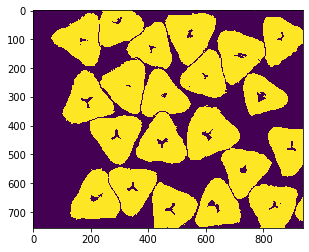

In [8]:
### Testing re-assignment of classes
plt.imshow(img_shift)
img_shift.min()
img_shift.max()

In [9]:
new_img = np.zeros(img.shape, dtype=np.int)
new_img[new_img == marker] = fg
img_shift = new_img - 1